In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import secondary_fyncions as sf

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist


In [2]:

data = pd.read_csv('german_credit_data.csv', index_col=0)
data_raw = data.copy(deep=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [4]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [6]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
data['Checking account']=data['Checking account'].map({
    'little':1,
    'moderate':2,
    'rich':3
})

data['Saving accounts'] = data['Saving accounts'].map({
    'little':1,
    'moderate':2,
    'quite rich':3,
    'rich':4
})

data['Sex'] = data['Sex'].map({
    'female':0,
    'male': 1
})

for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].median(), inplace=True)

data = sf.get_dummies(data, 'Housing', 'Housing')
data = sf.get_dummies(data, 'Purpose', 'Purpose')

In [8]:
data.isnull().sum()

Age                            0
Sex                            0
Job                            0
Saving accounts                0
Checking account               0
Credit amount                  0
Duration                       0
Housing_free                   0
Housing_own                    0
Housing_rent                   0
Purpose_business               0
Purpose_car                    0
Purpose_domestic appliances    0
Purpose_education              0
Purpose_furniture/equipment    0
Purpose_radio/TV               0
Purpose_repairs                0
Purpose_vacation/others        0
dtype: int64

In [9]:
data.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1.0,1.0,1169,6,0,1,0,0,0,0,0,0,1,0,0
1,22,0,2,1.0,2.0,5951,48,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,1.0,2.0,2096,12,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,1.0,1.0,7882,42,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,1.0,1.0,4870,24,1,0,0,0,1,0,0,0,0,0,0


# Шкалирование данных

In [10]:

scaler = StandardScaler()
columns_for_scale = ['Age', 'Job', 'Credit amount', 'Duration', 'Saving accounts', 'Checking account']
scaled_columns = normalize(scaler.fit_transform(data[columns_for_scale]))
data[columns_for_scale] = pd.DataFrame(
    columns=columns_for_scale,
    data=scaled_columns
)

# Кластеризация K-Means

In [12]:
data.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.824690,1,0.032565,-0.074556,-0.427201,-0.171690,-0.318260,0,1,0,0,0,0,0,0,1,0,0
1,-0.351985,0,0.041562,-0.104966,0.105251,0.429997,0.816937,0,1,0,0,0,0,0,0,1,0,0
2,0.586007,1,-0.698800,-0.166003,0.151633,-0.150834,-0.308178,0,1,0,0,0,0,1,0,0,0,0
3,0.288052,1,0.036143,-0.089198,-0.445247,0.617041,0.573393,1,0,0,0,0,0,0,1,0,0,0
4,0.679466,1,0.054250,-0.145598,-0.615796,0.335338,0.150093,1,0,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

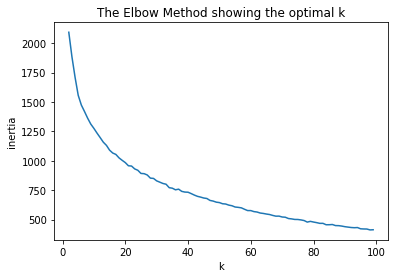

In [13]:
inertia = list()
silhouette = list()
n_clusters = 100
for i in range (2, n_clusters):
    km = KMeans(n_clusters=i).fit(data)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(data, km.labels_))

    
plt.plot(np.arange(2, n_clusters), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

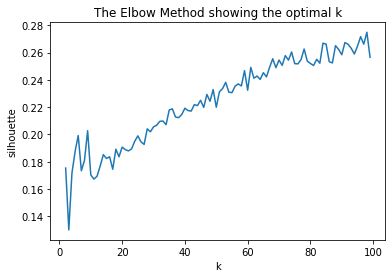

In [14]:
plt.plot(np.arange(2, n_clusters), silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('The Elbow Method showing the optimal k')

In [15]:
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

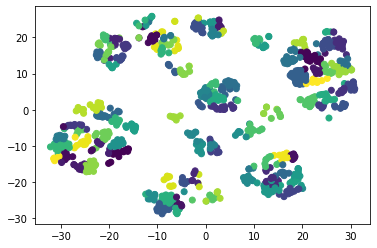

In [16]:
tsne = TSNE(perplexity=50)
tsne_transformed = tsne.fit_transform(data)
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=kmeans.labels_);

# Кластеризация hierarchy

In [17]:
distance_mat = pdist(data)
Z = hierarchy.linkage(distance_mat, 'ward')

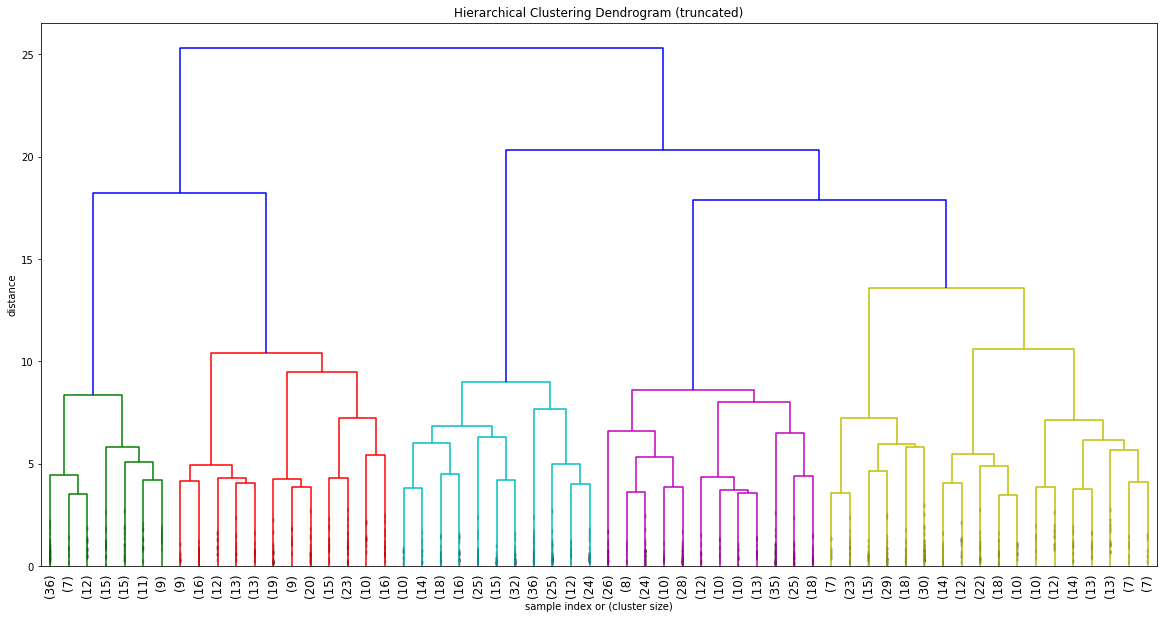

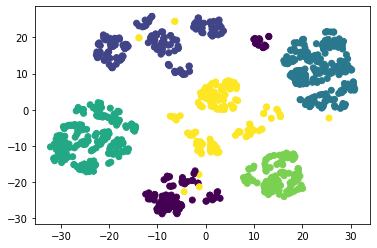

In [18]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=60,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()
clusters = fcluster(Z, 11, criterion='distance')
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=clusters);
plt.show()

# Кластеризация DBSCAN

Estimated number of clusters: 15
Estimated percentage of noise points: 6.50%


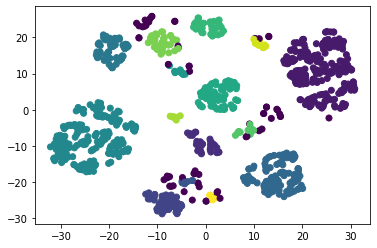

In [19]:
db = DBSCAN(eps=1.2).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: {}'.format(n_clusters_))
print('Estimated percentage of noise points: {:.2f}%'.format(100*n_noise_/data.shape[0]))

plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=labels);

# Интерпритация кластеризации

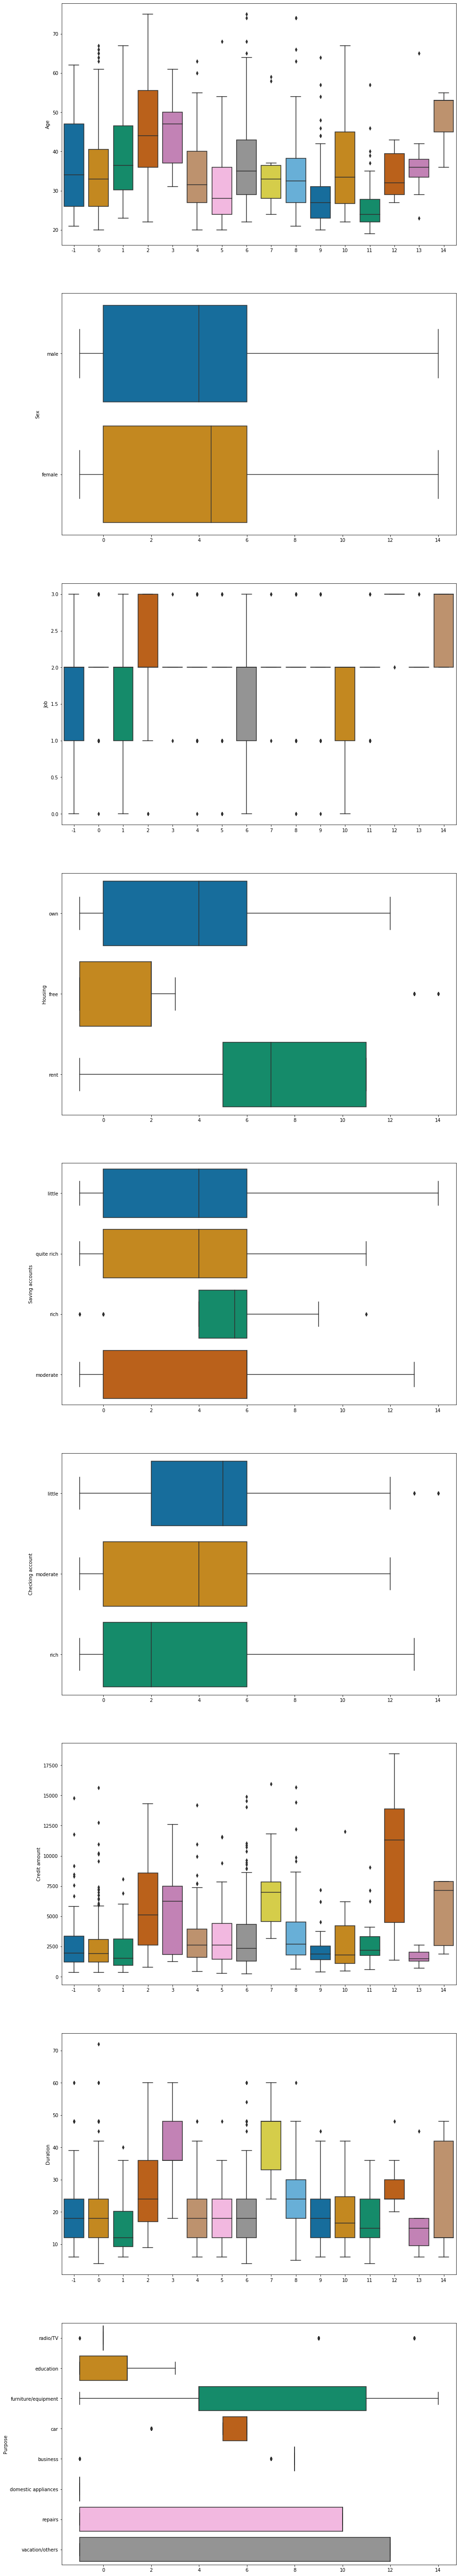

In [20]:
fig, ax = plt.subplots(nrows=len(data_raw.columns), ncols=1, figsize=(15, 100))


for index, column in enumerate(data_raw.columns):
    sns.boxplot(y=column, x=db.labels_, 
                     data=data_raw, 
                     palette="colorblind", ax=ax[index])
